# Chapter 8 Queues

## 8.1 The Queue ADT
* **A *queue* is a specialized list with a limited number of operations in which items can only be added to one end and removed from the other.**
    * **A queues is also known as a *first-in, first-out* (FIFO) list.**
    * **New items are inserted into a queue at the *back* while existinhg iutems are removed from the front.**
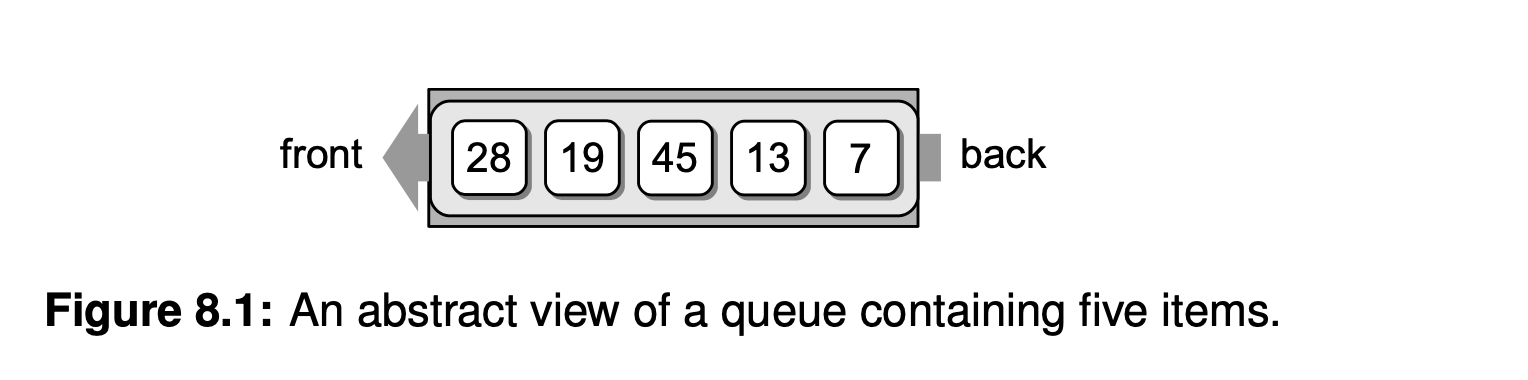

**Queue ADT**<br>
* **A queue is a data structure that a linear collection of items in which access is restricted to a first-in first-out basis. New items are inserted at the back and existing items are removed from the front. The items are maintained in the order in which they are added to the structure.**
    * Queue( ): **Creates a new empty queue, which is a queue containing no items.**
    * isEmpty( ): **Returns a boolean value indicating whether the queue is empty.**
    * length( ): **Returns the number of items currently in the queue.**
    * enqueue(item): **Adds the given item to the back of the queue.**
    * dequeue(): **Removes and returns the front item from the queue. An item cannot be dequeued from an empty queue.**

## 8.2 Implementing the Queue

### 8.2.1 Using a Python List
* **The simplest way to implement the Queue ADT is to use Python's list.**
    * **We can remove items from the front of the list and append new items to the end.**
    * **To use a list for the Queue ADT, the constructor must define a single data field to store the list that is intially empty.**
    
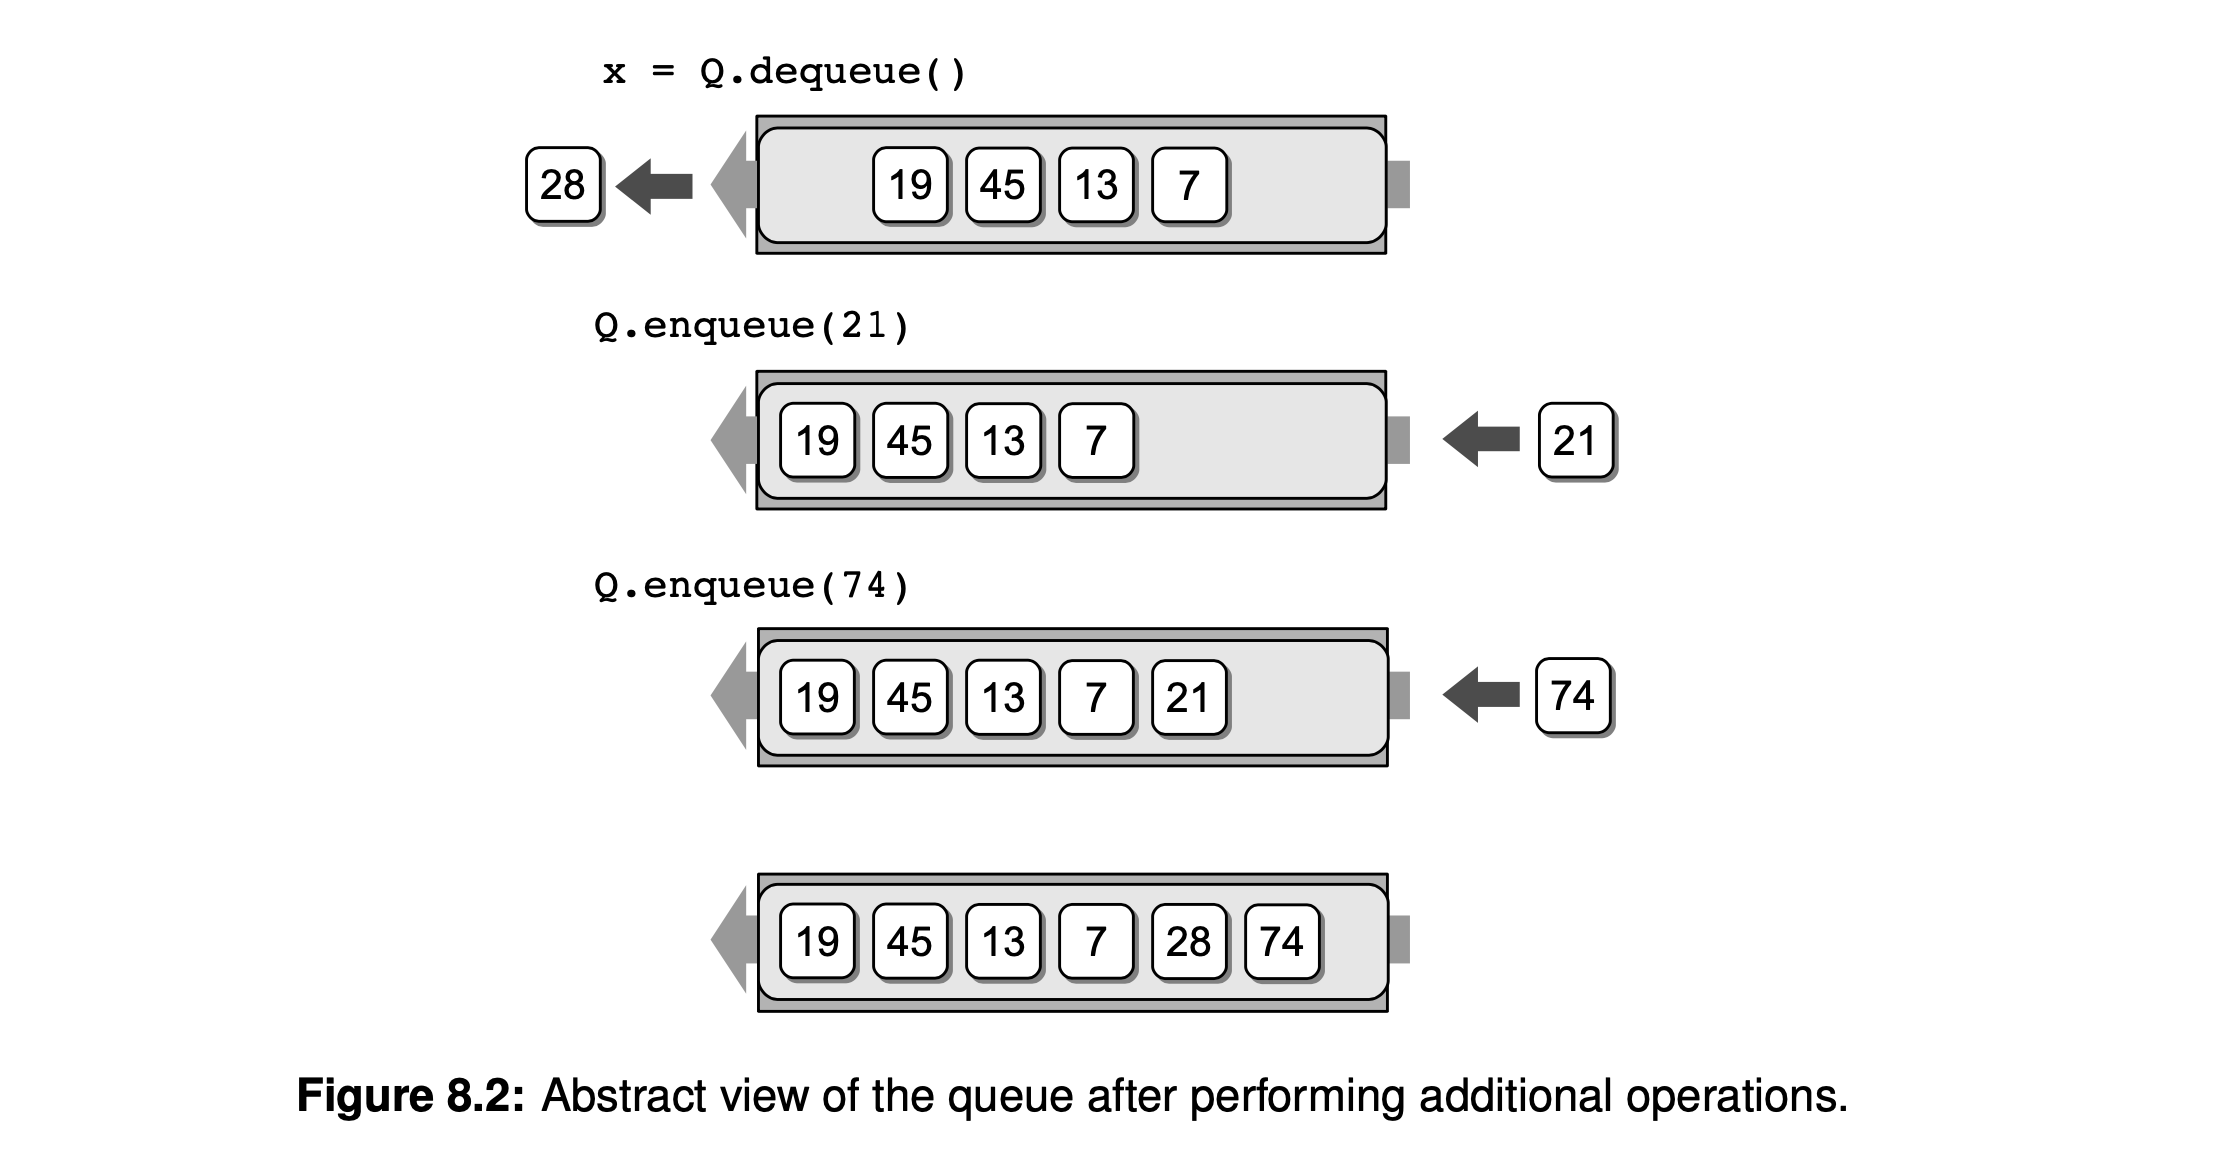 
* **The queue definition prohibits the use of the** dequeue( ) **operation on an empty queue. To enforce this, we must first assert the queue is not empty and raise an exception, when the operation is attempted on an empty queue.**
* **The size and empty condition opeations only require $O(1)$ time.**
* **The enqueue operation requires $O(n)$ time in the worst case since the list may need to expand to accomidate the new item.**
* **When used in sequence, the enqueue operation has an amortized cost of $O(1)$.**
* **The dequeue operation also requires $O(n)$ requires $O(n)$ time since the underlying array used to implement the Python list. may need to shrink when an item is removed.**

In [2]:
# Implementation of the Queue ADT using a Python list
class Queue: 
    # Creates an empty queue
    def __init__(self):
        self._qList = []
        
    # Returns True if the queue is empty
    def isEmpty(self):
        return len(self) == 0
    
    # Returns the number of items in the queue
    def __len__(self):
        return len(self._qList)
    
    # Adds the given item to the queue
    def enqueue(self, item):
        self._qList.append(item)
    
    # Removes and returns the first item in the queue
    def dequeue(self):
        assert not self.isEmpty(), "cannot dequeue from an empty queue"
        return self._qList.pop(0)

### 8.2.2 Using a Circular Array
* **A *circular array* is simply an array viewed as a circle instead of line.**
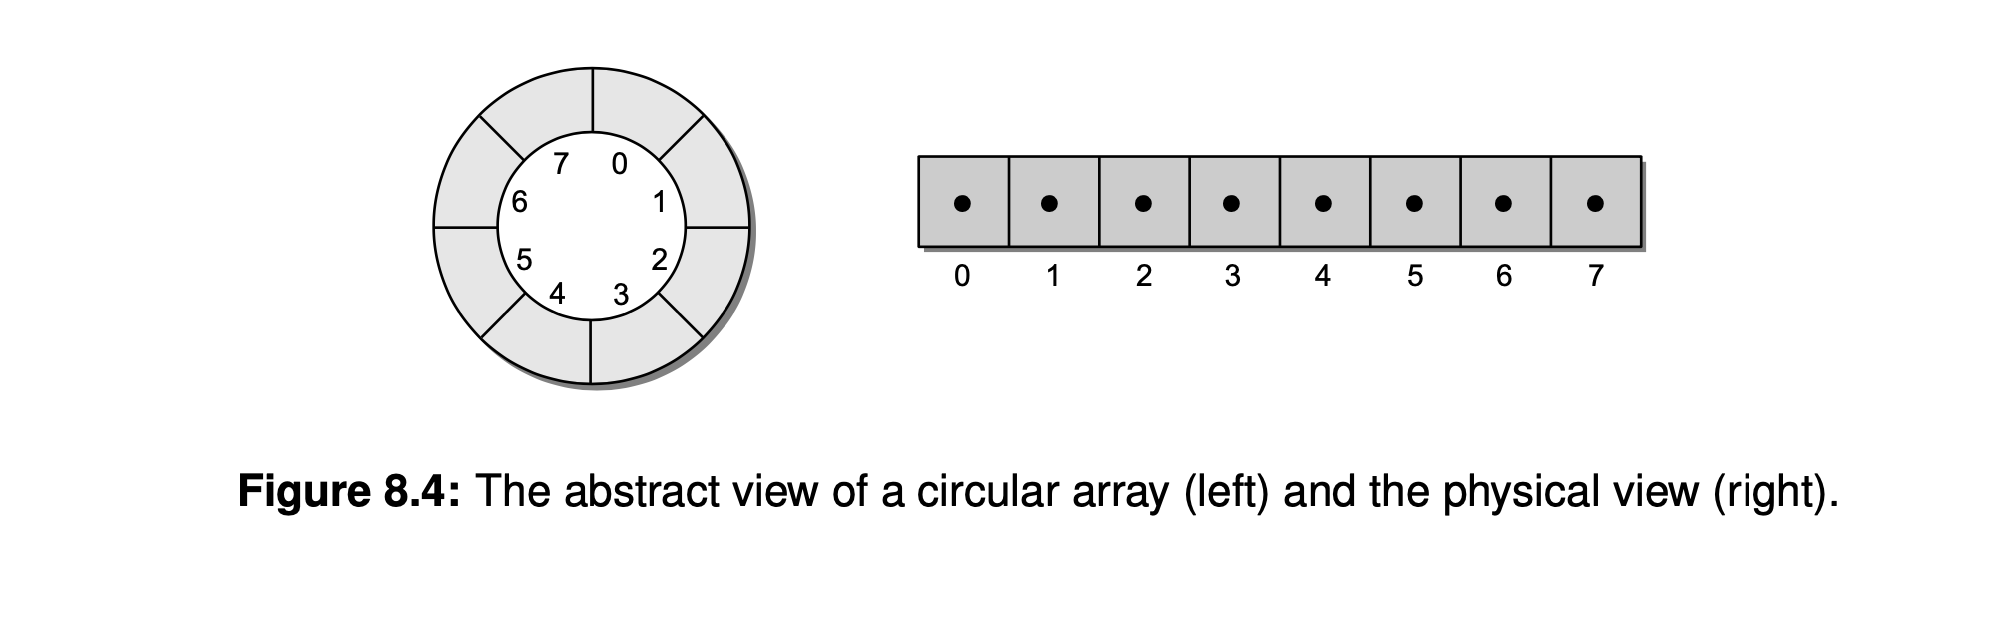

### Data Organization
* **To implement a queue as a circular array, we must maintain a count field and two markers. The count field is necessary to keep track of how mnay items are currently in the queue since only a poriton of the array may actually contain queue items. The markers indicate array elements containing the first and last item in the queue.**
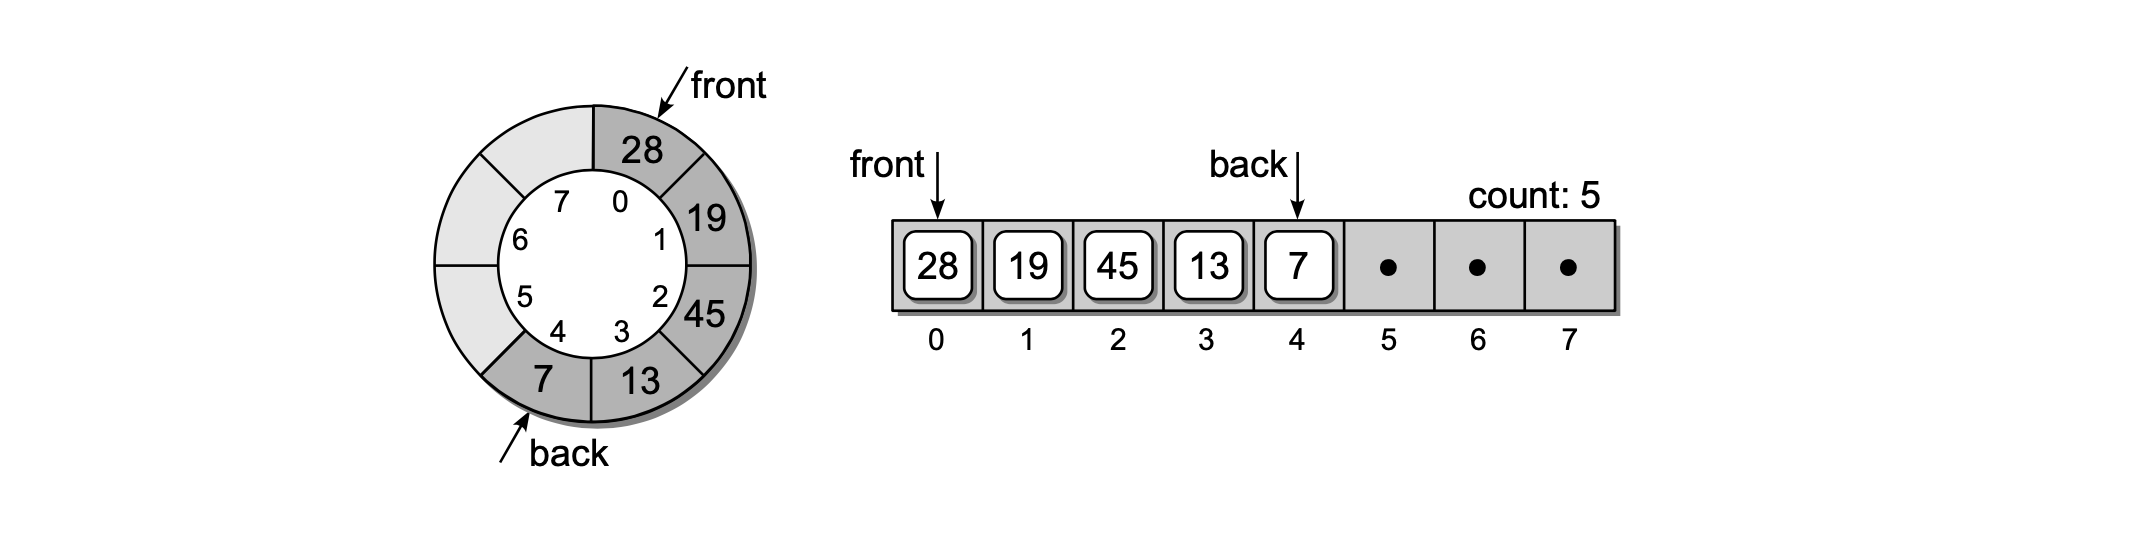
    * **New items are added to the queue by inserting them in the position immediately dollowing the** back **marker. The marker is then advanced one position and the counter is incremented to reflect the addition of the new item.**
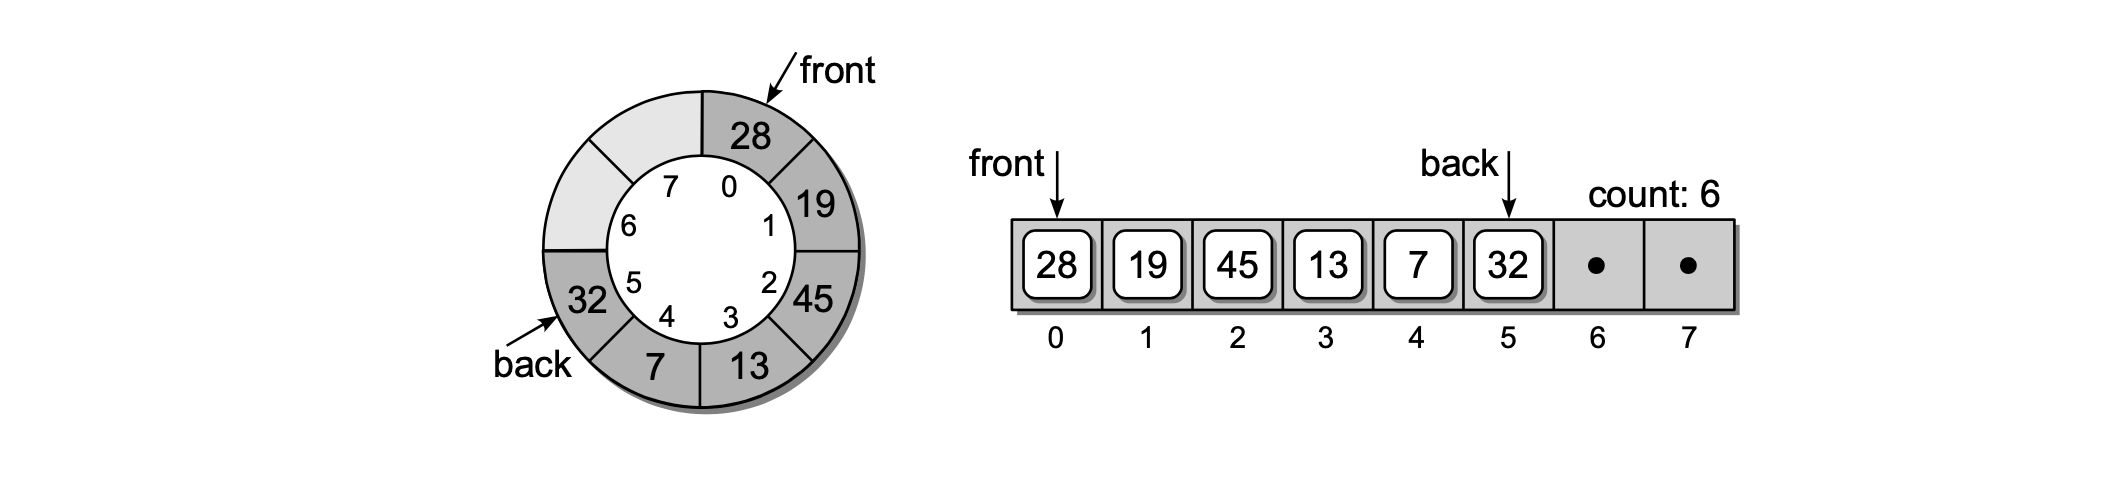
    * **To dequeue an item, the value in the element marked by** front **will be returned and the marker is advanced one position.**
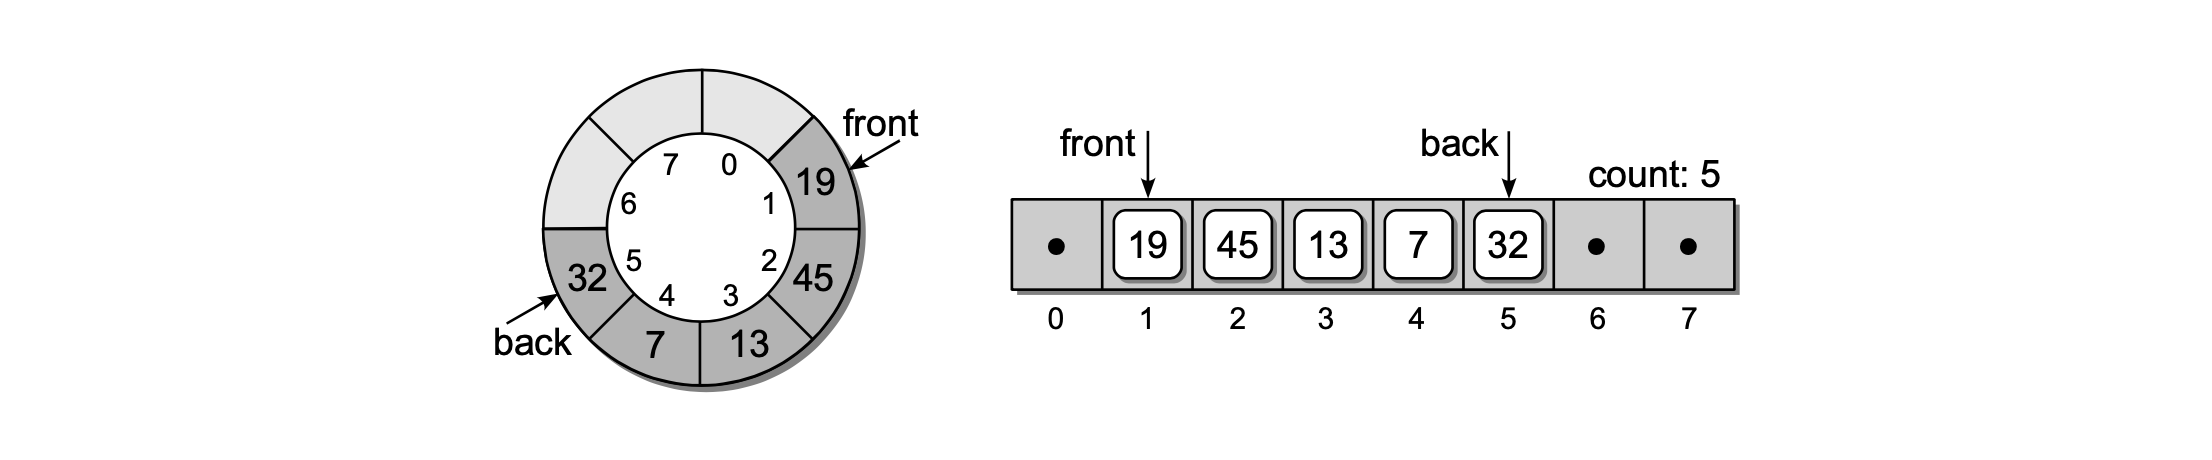
* **The queue wraps around the circular array as iitems are added and removed, which eliminates the need to shift items.**
    * **This also represents a full queue since all slots in the array are filled.**
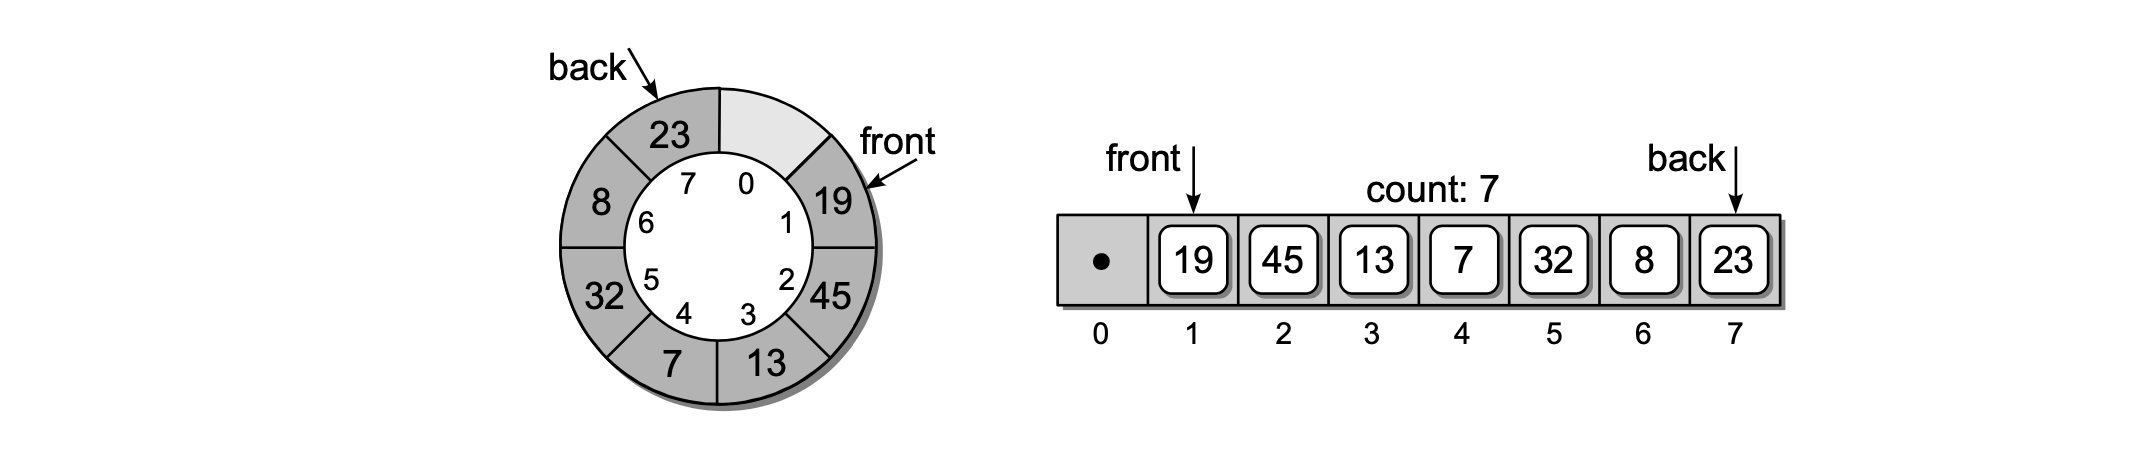
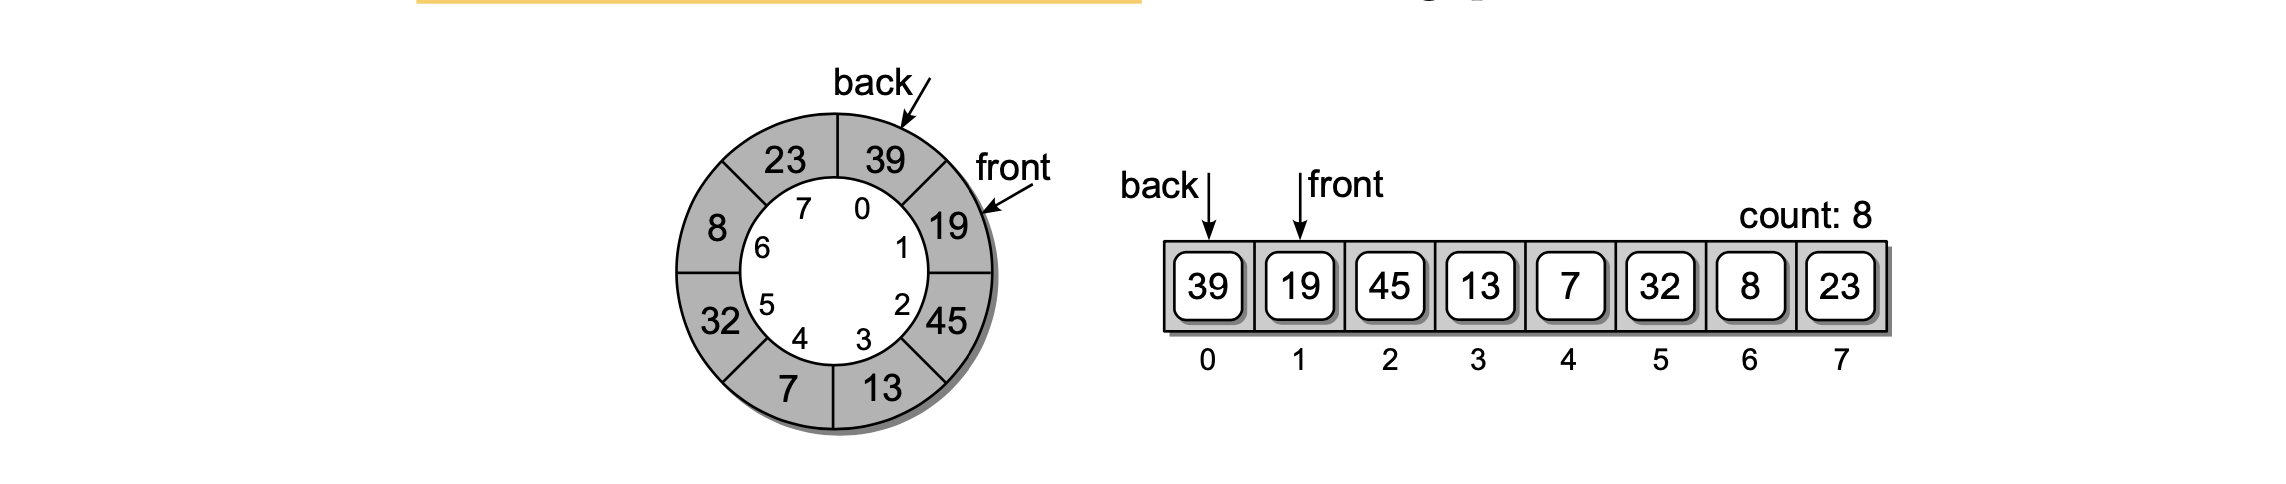

### Queue Implementation
* **The constructor creates an object containing four data field, including the counter to keep track of the number of items in the queue, the two markers, and the array itself.**
* **For the circular queue, the array is create with** maxSize **elements as specified by the argument to the constructor. The two markers are initialized so the first item will be stored in element 0.**
* **The** size( ) **and** isEmpty( ) **methods use the value of** \_count **to return the appropriate result.**
* **To enqueue an item, we must first test the precondition and verify if the queue is not full. If the condition is met, the new item can be inserted into the position immediately following the $\_back$ marker.**

### Run Time Analysis
* **The operations all have a worst case time-complexity of $O(1)$ since the array items never have to be shifted. But the circular array does introduce the drawback of working with maximum-capacity queue.**

In [5]:
# Implementation of the Queue ADT using a circular array
class Queue:
    # Creates an empty queue
    def __init__(self, maxSize):
        self._count = 0
        self._front = 0
        self._back = maxSize - 1
        self.qArray = Array(maxSize)
        
    # Returns True if the queue is empty
    def isEmpty(self):
        return self._count == 0
    
    # Returns True if the queue is full
    def isFull(self):
        return self._count == len(self._qArray)
    
    # Returns the number of items in the queue
    def __len__(self):
        return self._count
    
    # Adds the given item to the queue
    def enqueue(self, item):
        assert not self.isFull(), "Cannot enqueue to a full queue."
        maxSize = len(self._qArray)
        self._back = len(self._back + 1) % maxSize
        self._qArray[self._back] = item
        self._count += 1
        
    # Removes and returns the first item in the queue
    def dequeue(self):
        assert not self.isEmpty(), "Cannot dequeue from an empty queue"
        item = self._qArray[self._front]
        maxSize = len(self._qArray)
        self._front = (self._front + 1) % maxSize
        self._count -= 1
        return item

### 8.2.3 Using a Linked List
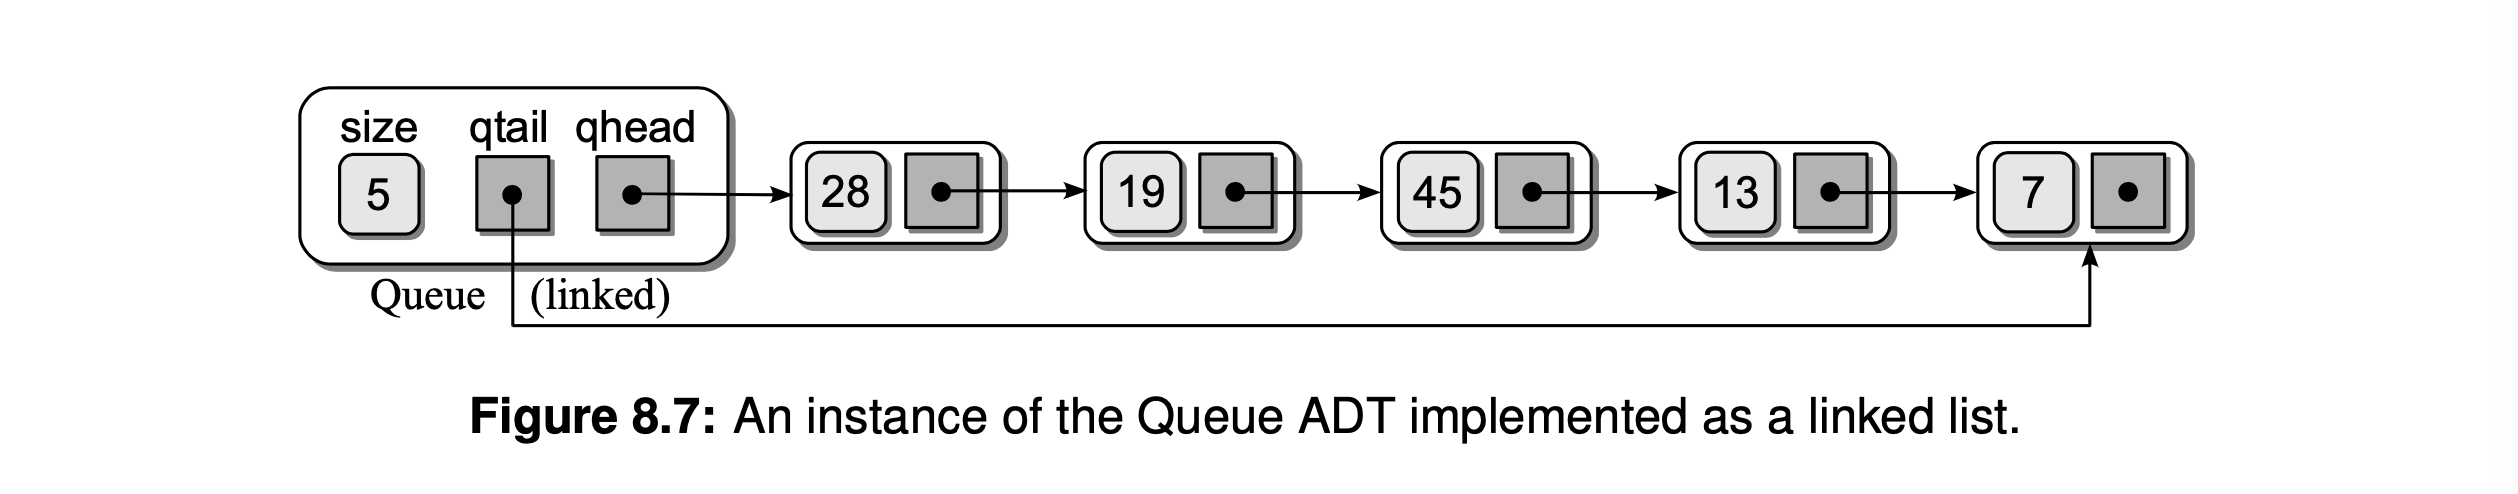
* **The individual nodes in the list contain the individual items in the queue. When dequeueing an item, we ust unlink the node from the list but return the item stored in that node and not the node itself.**


In [6]:
# Implementation of the Queue ADT using a linked list
class Queue:
    # Creates an empty queue
    def __init__(self):
        self._qhead = None
        self._qtail = None
        self._count = 0
    
    # Returns Ture if the queue is empty
    def isEmpty(self):
        return self._qhead is None
    
    # Returns ther number of items in the queue
    def __len__(self):
        return self._count
    
    # Adds the given item to the queue
    def enqueue(self, item):
        node = _QueueNode(item)
        if self.isEmpty():
            self._qhead = node
        else:
            self._qtail.next = node
        
        self._qtail = node
        self._count += 1
        
    # Removes and returns the first item in the queue
    def dequeue(self):
        assert not self.isEmpty(), "Cannot dequeue from an empty queue"
        node = self._qhead 
        if self._qhead is self._qtail:
            self._qtail = None
            self._qhead = self._qhead.next
            self._count -= 1
            return node.item
        
# Private storage class for creating the linked list nodes
class _QueueNode():
    def __init__(self, item):
        self.item = item
        self.next = None

## 8.3 Priority Queues

### 8.3.1 The Priority Queue ADT 
* **The *bounded priority queue* assumes a small limited range of $p$ priorities over the interval of integers $[0 \dots p)$.**
* **The *unbounded priority queue* places no limit on the range of integer values that can be used as priorities.**

**Priority Queue ADT**<br>
* **A *priority queue* is a queue in which each item is assigned a priority and items with a higher priority are removed before those priority, irrespective of when they were added. Integer values are used for the priorities with a smaller integer value having a higher priority.**
    * **A *bounded priority queue* restricts the priorities to the integer values between zero and a predefined upper limit whereas an *unbounded priority queue* places no limits on the range of priorities.**
* PriorityQueue( ):**creates a new empty unbounded priority queue.**
* BPriorityQueue(numLevels):**Creates a new empty bounded priority queue with priority levels in the range from** 0 **to** numLevels - 1
* isEmpty( ): **Returns a boolean value indicatinvg whether the queue is empty.**
* length( ): **Returns the number of items currently in the queue.**
* enqueue(item, priority): **Adds the given item to the queue by inserting it in the proper position based on the given priority. The** priority **value must be within the legal range when using a bounded priority queue.**
* dequeue( ): **Removes and returns the front item from the queue, which is the item with the highest priority. The associated priority value is discarded. If two items have the same priority, then those items are removed in a FIFO order. An item cannot be dequeued from an empty queue.**
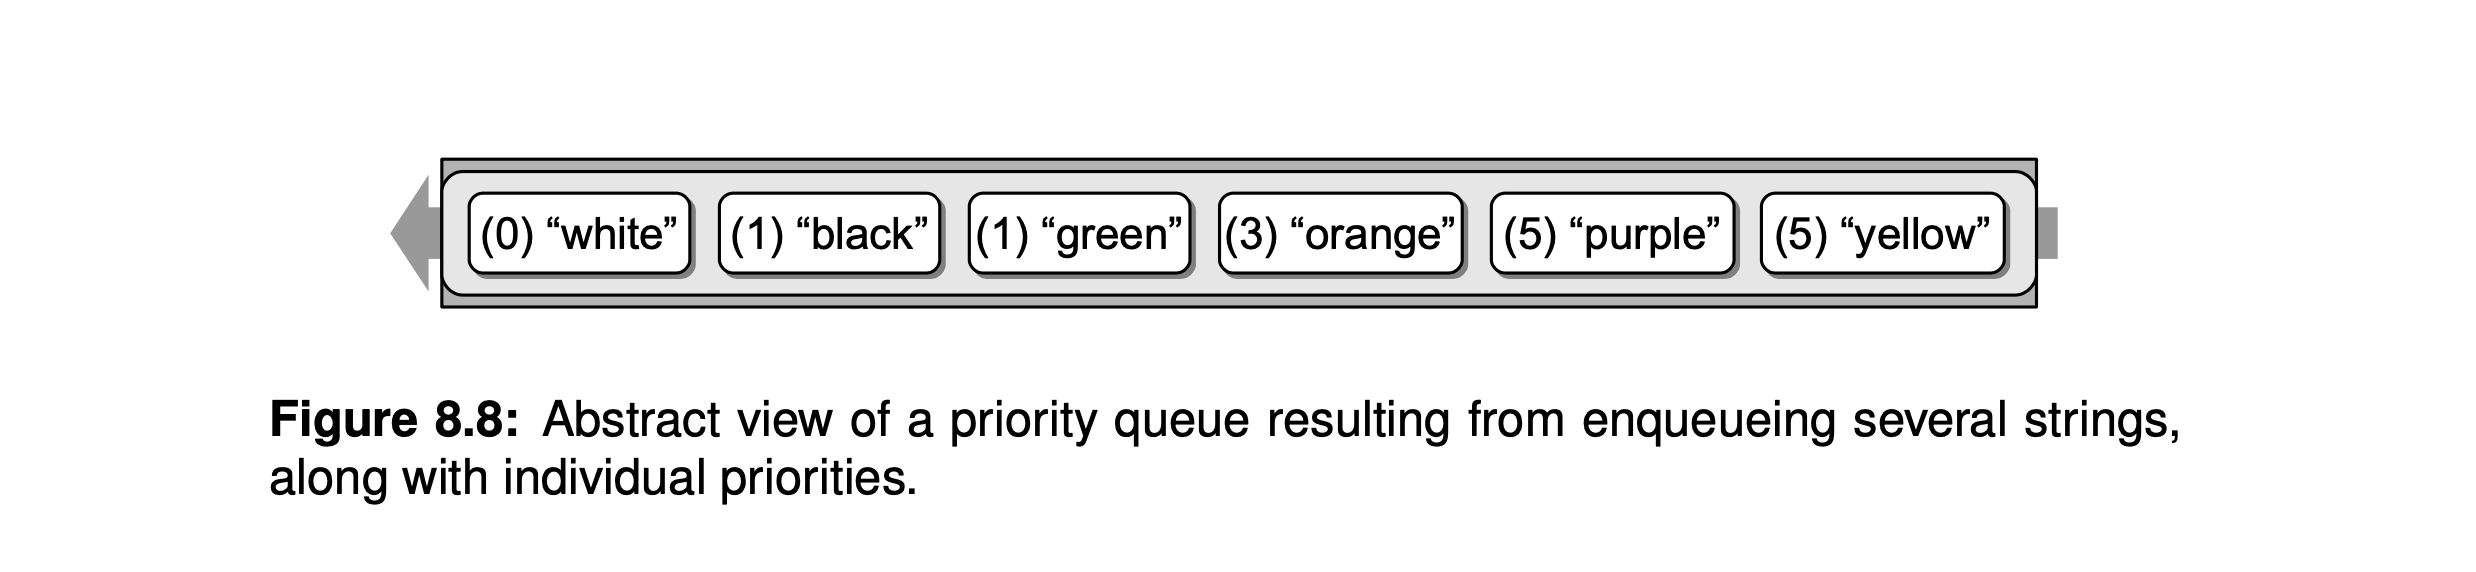

### 8.3.2 Implementation: Unbounded Priority Queue

* **A priority must be associated with each item in the queue, possibly requiring the value to be stoed along with the item.**
* **The next item to be dequeed fromt he priority queue is the item with the highest priority.**
* **If multiple items have the same priority, those items must be dequeues in the the order they were originaly enqueued.**

### Python List Implementation
* **When implementing the priority queue, however, the items cannot simply be added directly to the list, but instead we must have a way to associate a priority with each item.**
    * **This can be accomplished with a simple storage class containing two fields: one for the priority and one for the queue item.**
* ***Append new items to the end of the list.* When nes items is enqueued, simply append a new instance of the storage class(containing the items and its priority) to the end of the list.**
* **To evaluate the efficiency, we consider the implementation of each operation.**
    * **Testing for an empty queue and determining the size can be done in $O(1)$ time. The enqueue operation requires linear time in the worst case since the underlying array may have to reallocated, but it has a $O(1)$ amortized cost. The dequeue operation is also $O(n)$ since we must search through the entire list in the worst case to find the entry with the highest priority.**
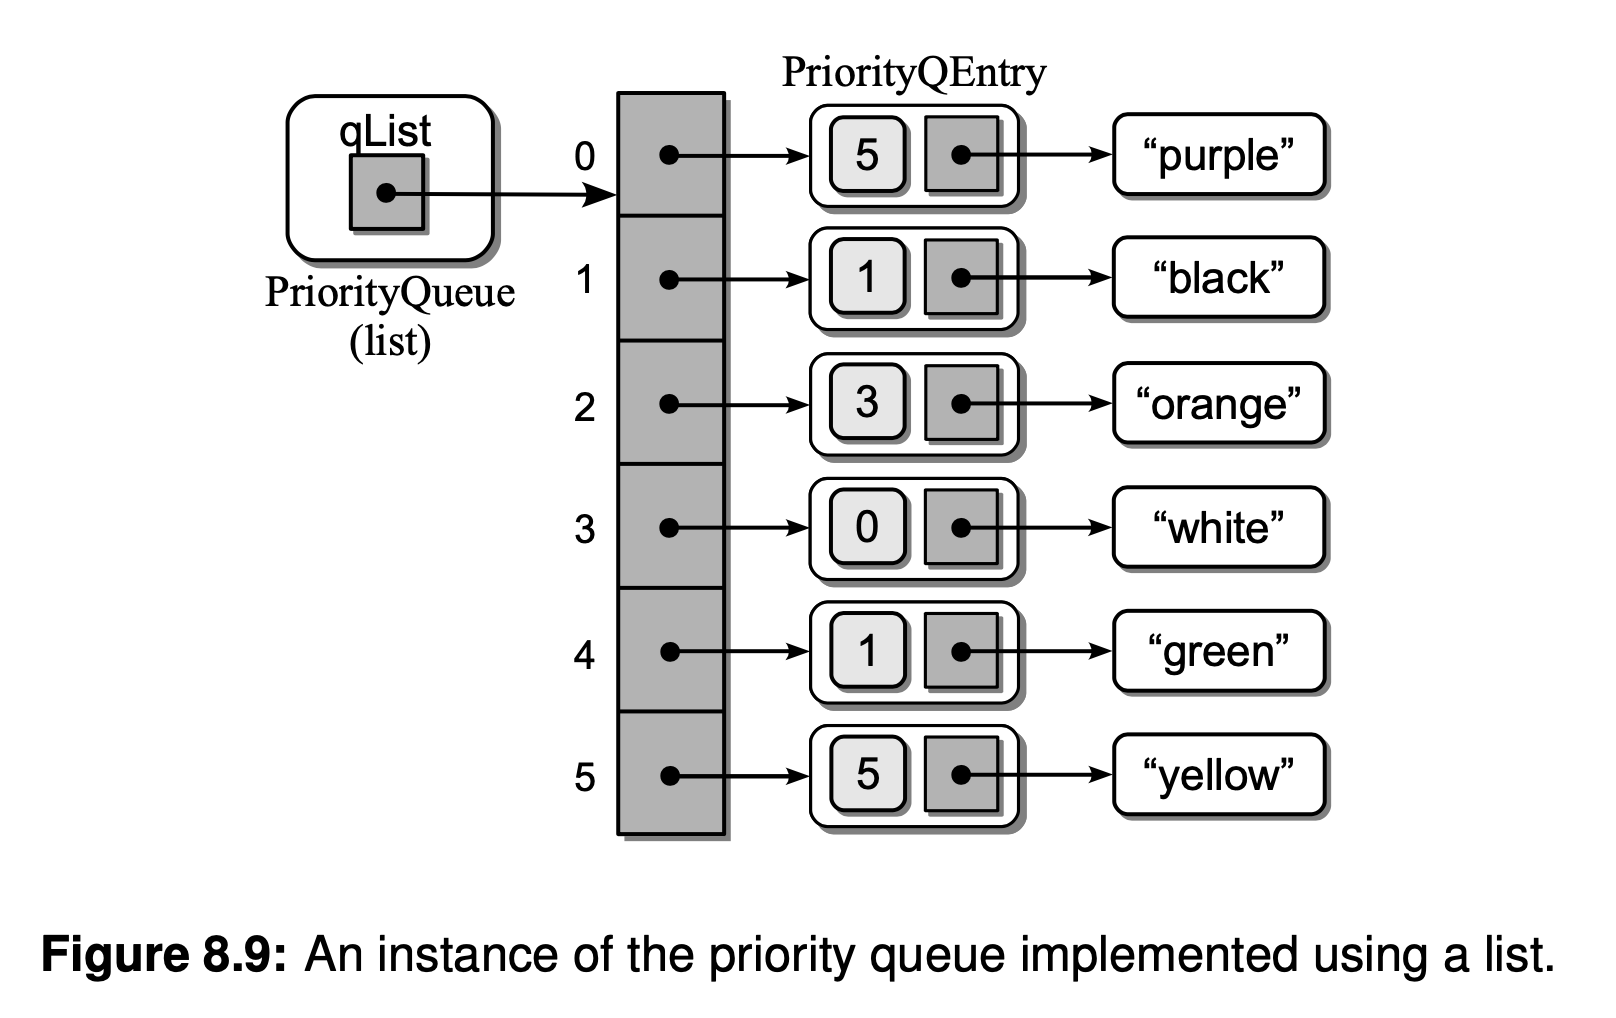

In [7]:
# Implementation of the unbounded Priority Queue ADT using a Python list
# with new items appended to the end
class PriorityQueue:
    # Creates an empty unbounded priority queue
    def __init__(self):
        self._qList = list()
        
    # Returns True if the queue is empty
    def isEmpty(self):
        return len(self) == 0
    
    # Returns the number of items in the queue
    def __len__(self):
        return len(self._qList)
    
    # Adds the given item to the queue
    def enqueue(self, item, priority):
        # Create a new instance of the storage class and append it to the list
        entry = _PriorityQEntry(item, priority)
        self._qList.append(entry)
    
    # Removes and retruns the first item in the queue
    def dequeue(self):
        assert not self.isEmpty(), "Cannot dequeue from an empty queue."
        
        # Find the entry with the highest priority
        highest = self._qList[i].priority
        for i in range(self.len()):
            # See if the ith entry contains a higher priority (smaller integer)
            if self._qList[i].priority < highest:
                highest = self._qList[i].priority
                
        # Removes the entry with the highest priority and return the item
        entry = self._qList.pop(highest)
        return entry.item
    
# Private storage class for associating queue items with their priority
class _PriorityQEntry():
    def __init__(self, item, priority):
        self.item = item
        self.priority = priority
        

### Linked List Implementation
* **A singly linked list structure with both head and tail references can be used to implement the priority queue.** 
    * **The $\_QueueNode $ class used in the implementatio of the queue ADT using a linked list has to be modified to include the priority value.**
    * **When an item is enqueued, the new node is appended to the end of the linked list and when a dequeu operation is performed, the linked list is searched to find the entry with the highest priority.**
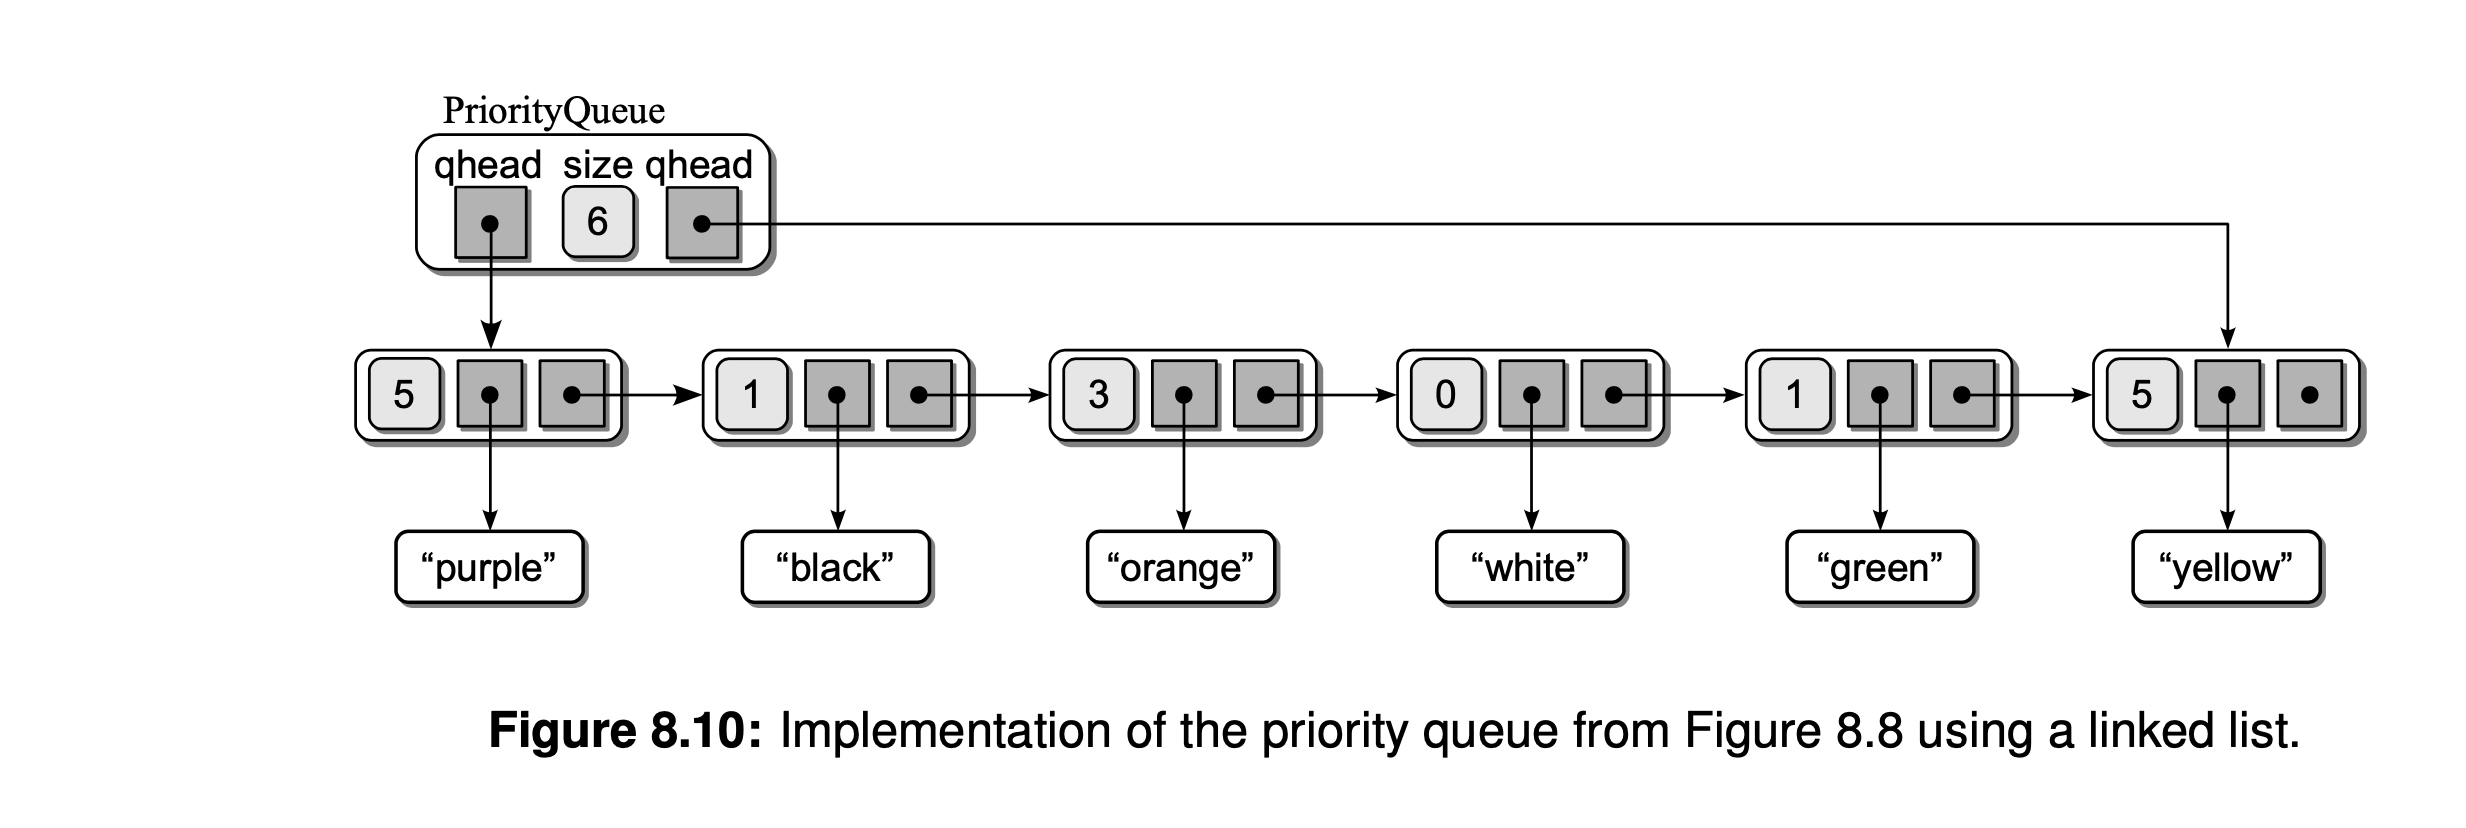

* **Testing for an empty queue and determining the size can be done in $O(1)$ time. The enqueue operation can also be done in constant time since we need only append a new node to the end of the list. The dequeue operation requires $O(n)$ time since the entrie list must be searched in the worst case to find the entry with the highest prirority.**

### 8.3.3 Implementation: Bounded Priority Queue
* **Since the priorities of a bounded priority queue are restricted to a finite set $[0, \dots, p), $ we can improve this worst case time with an implementation in which all of the operations only require constant time.**
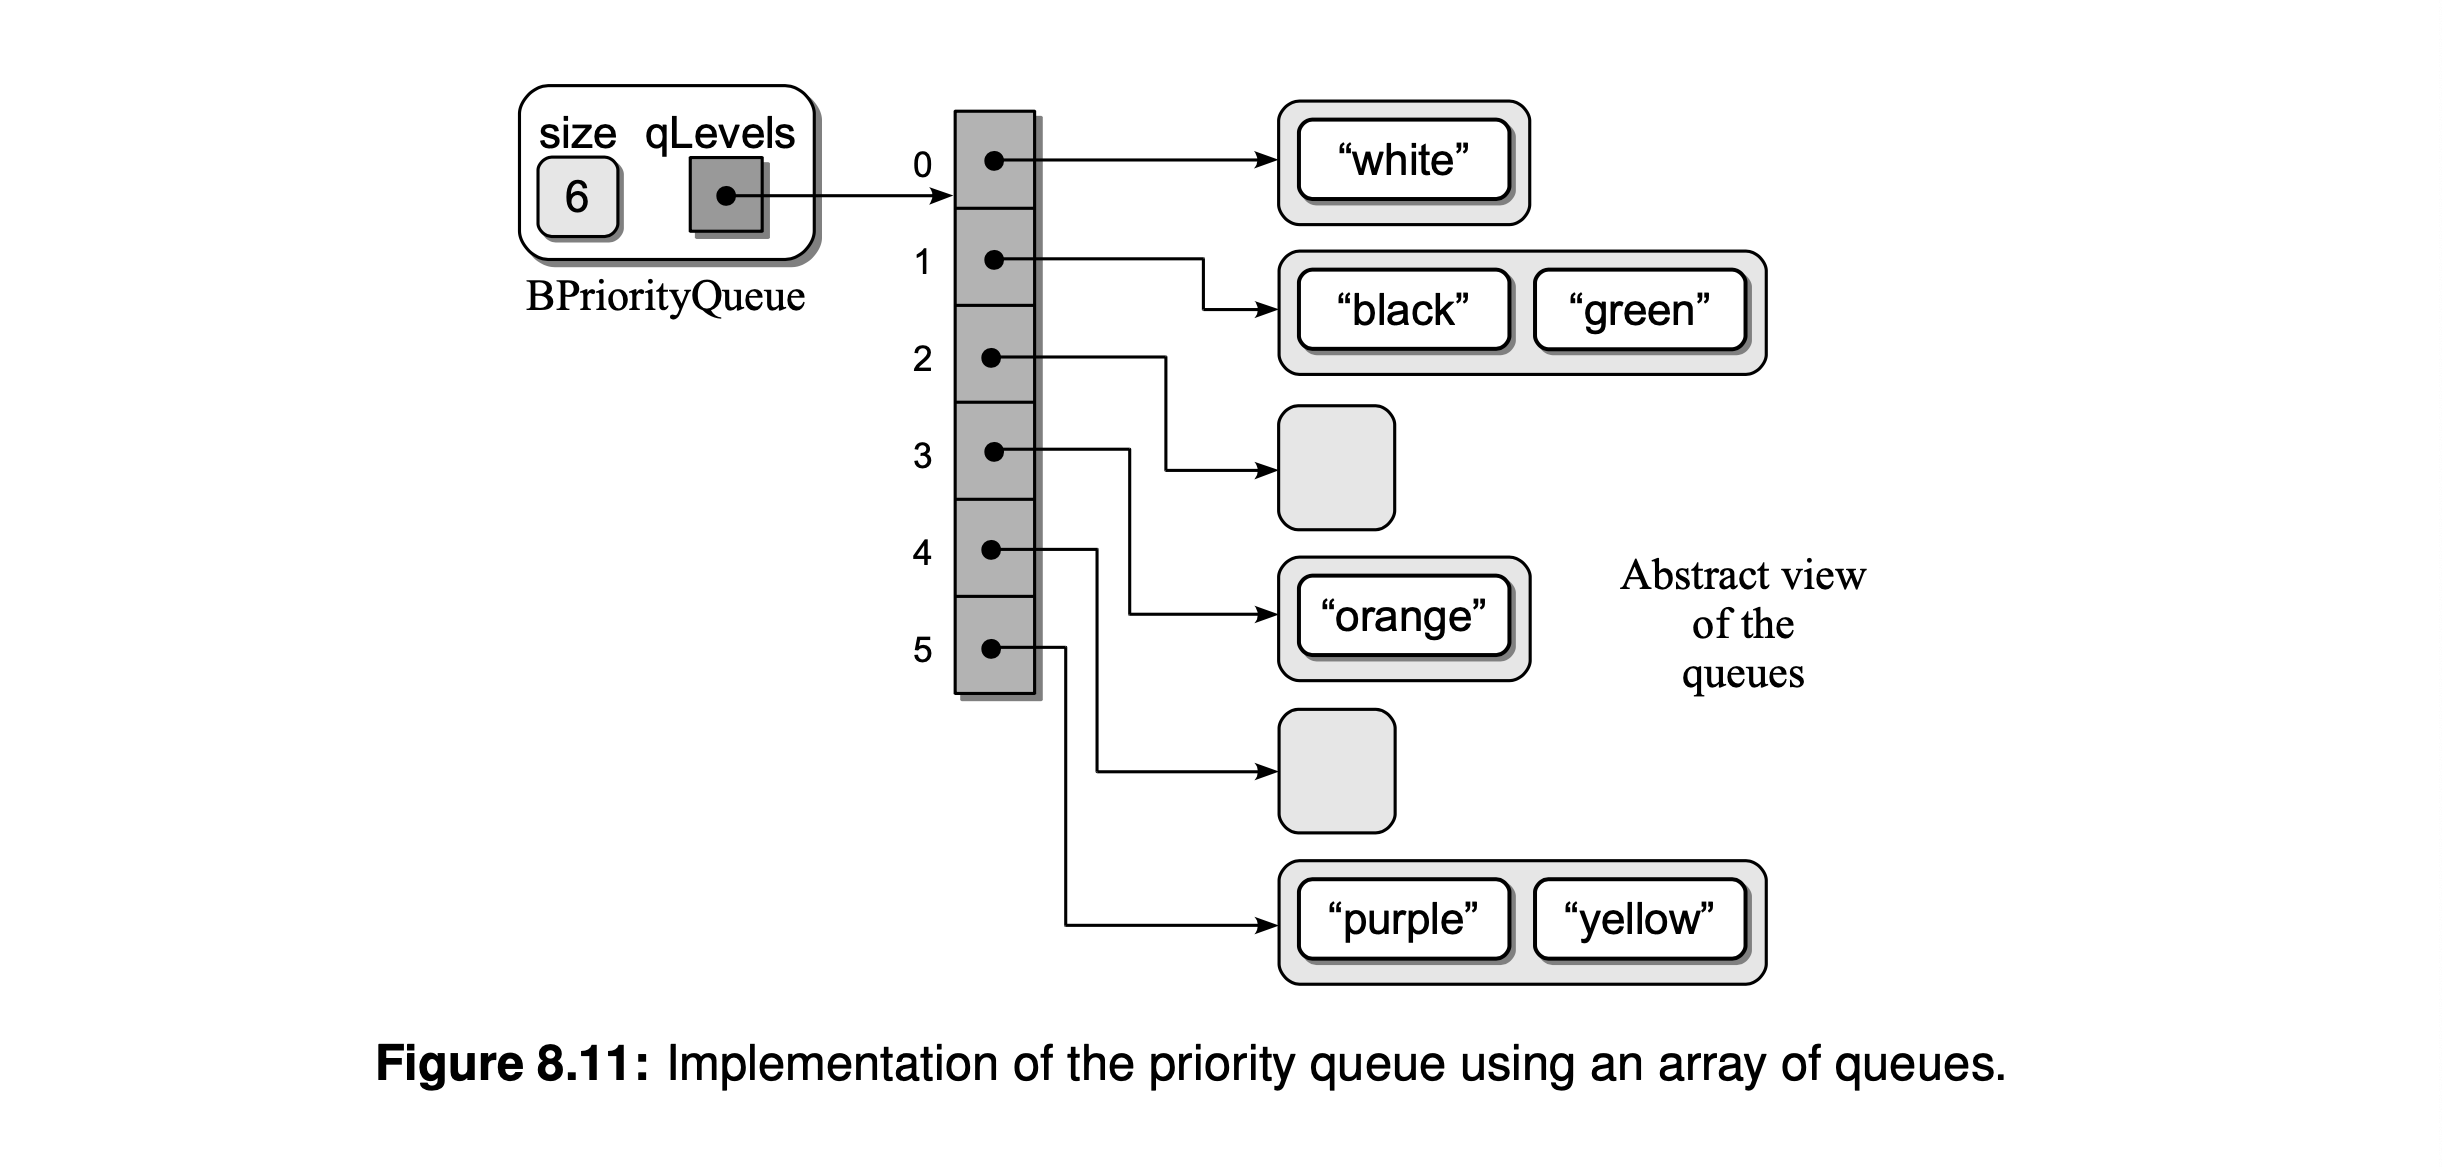
* **The constructor creates two data fields. The $\_qLevels$ field contains an array of $p$ ekements in which each contains an instance of the Qyeye ADT. The $\_Size $ field maintains the number of items in the priority queue, which can also be used to determine if the queue is empty.**

In [9]:
class BPriorityQueue:
    # Creates an empty bounded priority queue
    def __init__(self, numLevels):
        self._qSize = 0
        self._qLevels = Array(numLevels)
        for i in range(numLevels):
            self._qLevels[i] = Queue()
        
    # Returns True if the queue is empty
    def isEmpty(self):
        return len(self) == 0
    
    # Returns True if the queue is empty
    def __len__(self):
        return len(self._qSize)
    
    # Adds the given item to the queue
    def enqueue(self, item, priority):
        assert priority >= 0 and priority < len(self._qLevels), "Invalid priority level"
        self._qLevels[priority].enqueue(item)
    
    # Removes and returns the next item in the queue
    def dequeue(self):
        # Make sure the queue is not empty
        assert not self.isEmpty(), "Cannot dequeue from an empty queue"
        # Find the first non-empty queue
        i = 0
        p = len(self._qLevels)
        while i < p and not self._qLevels[i].isEmpty():
            i += 1
        # We know the queue is not empty, so dequeue from the ith queue
        return self._qLevels[i].dequeue()

## Application: Computer Simulations
* **Simulations can allow humans to study certain behaviors or experiment with certain changes and events in a system to determine the appropriate strategy.**

### 8.4.1 Airline Ticket Counter
* **A queue structure is used to model queuing system in order to study certain behaviours or outcomes.**

### Queuing System Model
* **We can model a queuing system by constructing a *discrete event simulation*. The simulation is a sequence of significant events that cause a change in the system.**
    * **The simulation is time driven and performed over a preset time period. The passing of time is represented by a loop, which increments a discrete time variable once for each tick of clock.**
    * **The events can only occur at discrete time intervals. Thus, the time units must be small enough such taht no event can occur betweem units.**
    * **A simulation is commonly designed to allow the user to supply parameters that define the conditions of the system.**
    
### Random Events
* **We use the *random number generator* by Python to generate a number between 0.0 and 1.0. We compare this result to the probabilty**(prob) **of an arrival.**
    * **If the generated random number is between** 0.0 **and** prob **inclusive, the event occurs and we signal a customer arrival.**
    * **If the random value is greater than** prob, **then no customer arrives during the current time step and no action is taken.**
    * **The arrival porbability can be changed to alter the number of customers served in the simulation.**

### 8.4.2 Implementation

### System Parameters

### Passenger Class
* **First, we need a class to store information related to a single passenger.**
* **The class will contain two data fields. The first is an identification number used in the output of the event information. The second field records the time the passenger arrives. This value will be needed to determine the length of time the passenger waited in line before beginning service with an agent.**

In [10]:
# Used to store and manage information related to an airline passenger
class Passenger:
    # Creates a passenger object
    def __init__(self, idNum, arrivalTime):
        self._idNum = idNum
        self._arrivalTime = arrivalTime
    
    # Gets the passenger's id number
    def idNum(self):
        return self._idNum
    
    # Gets the passenger's arrival time
    def timeArrived(self):
        return self._arrivalTime

### Ticket Agent Class
* **We also need a class to represent and store information related to the ticket agents.**
* **The information includes an agent identification number and a timer to know when the transaction will be completed. This value is the sum of the current time and the average time of the transaction as entered by the user.**
* **Finally, we need to keep track of the current passenger being served by the agent in order to identify the specific passenger when the transaction is completed.**

In [11]:
# Used to store and manage information related to an airline ticket agent
class TicketAgent:
    # Creates a ticket agent object
    def __init__(self, idNum):
        self._idNum = idNum
        self._passenger = None
        self._stopTime = -1
    
    # gets the ticket agent's id number
    def idNum(self):
        return self._idNum
    
    # Determines if the ticket agent has finished helping the passenger.
    def isFree(self):
        return self._passenger is None
    
    # Determines if the ticket agent has finished helping the passenger
    def isFinished(self, curTime):
        return self._passenger is not None and self._stopTime == curTime
    
    # Indicates the ticket agent has begun assisting a passenger
    def startService(self, passenger, stopTime):
        self._passenger = passenger
        self._stopTime = stopTime
    
    # Indicates the ticket agent has finished helping the passenger
    def stopService(self):
        thePassenger = self._passenger
        self._passenger = None
        return thePassenger
    

### Simulation Class
* **The first step in the constructor is to initialize three simulation parameters.**
    * **The** \_arriveProb **is the probability of a passenger arriving the current time step. The ticket agents are represented as an array of** Agent **objects. The individual objects are instantiated and each is assigned an id number, starting with 1.**
    * **Two data fields are needed to stroe data collected during the actual simulation. The first is the summation of the time each passenger has to wiat in line before being served, and the second keeps track of the number of passengers in simulation. The latter will also be used to assign an id to each passenger.**
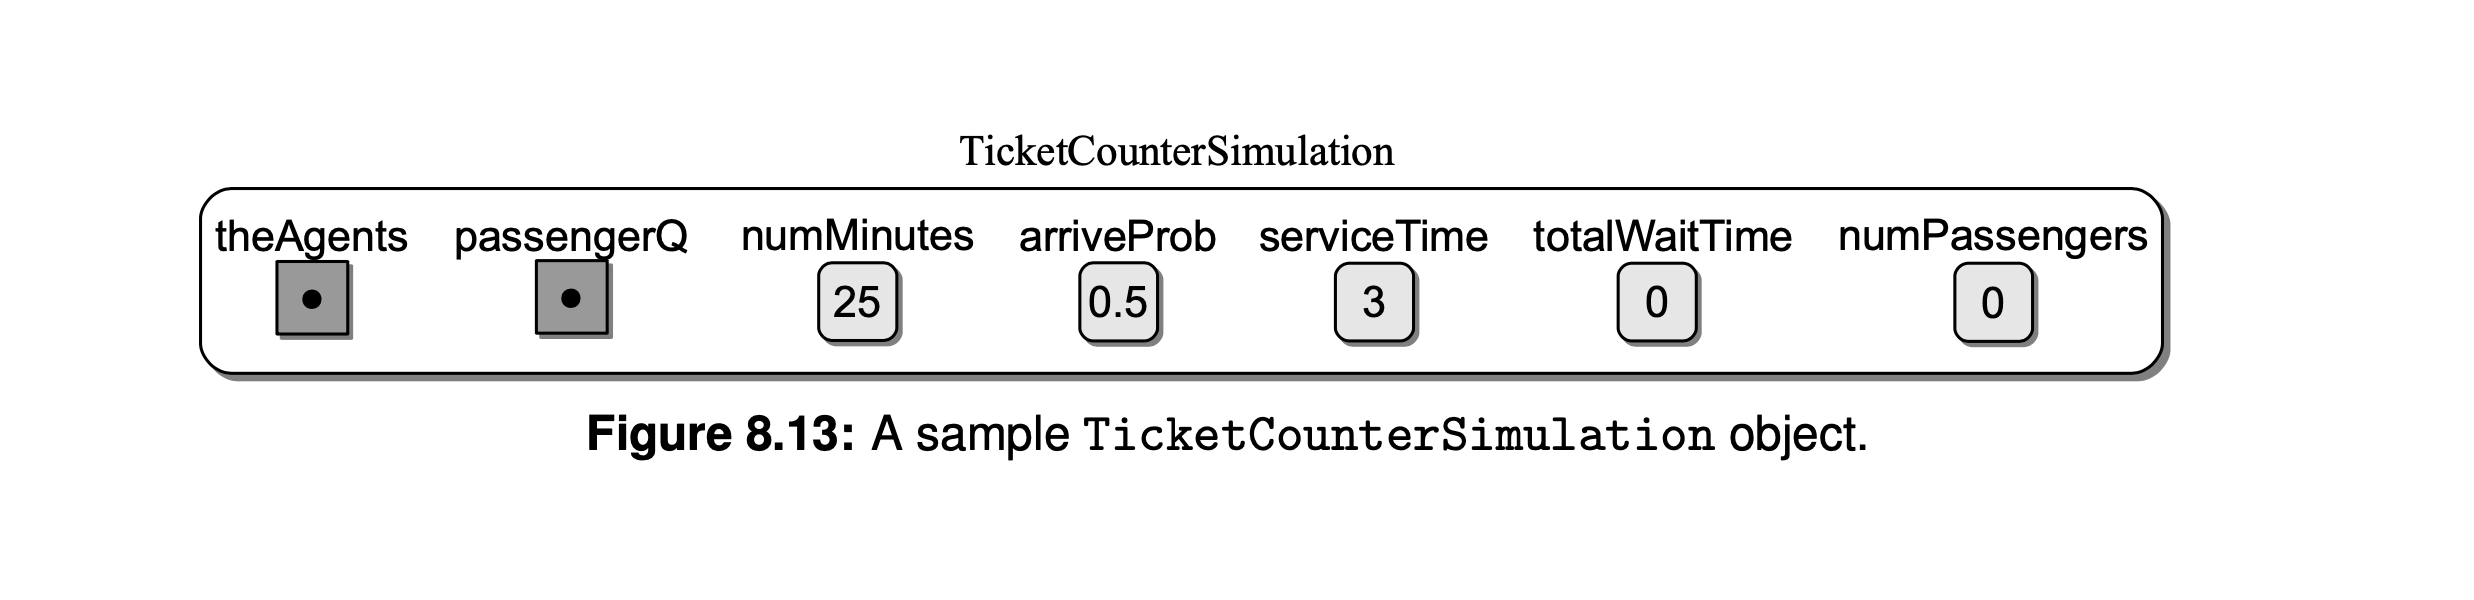

In [12]:
# Implementation of the main simulation class
class TicketCounterSimulation:
    # Creates a simulation object
    def __init__(self, numAgents, numMinutes, betweenTime, serviceTime):
        # Parameters supplied by the user
        self._arriveProb = 1.0 / betweenTime
        self._serviceTime = serviceTime
        self._numMinutes = numMinutes
    
        # Simulation components
        self._passengerQ = Queue()
        self._theAgents = Array(numAgents)
        for i in range(numAgents):
            self._theAgents[i] = TicketAgent(i+1)
        
        # Computed during the simulation
        self._totalWaitTime = 0
        self._numPassengers = 0
    
    # Run the simulation using the parameters supplied earlier
    def run(self):
        for curTime in range(self._numMinutes + 1):
            self._handleArrival(curTime)
            self._handleBeginService(curTime)
            self._handleEndService(curTime)
        
    # Print the simulation results
    def printResults(self):
        numServed = self._numPassengers - len(self._passengerQ)
        avgWait = float(self._totalWaitTime) / numServed
        print("")
        print(f"Number of passengers served = {numServed}")
        print("Number of passengers remaining in line = %d" % len(self._passengerQ))
        print("The average wait time was %4.2f minutes." % avgWait)